<a href="https://colab.research.google.com/github/Sanghita-C/Practice-codes/blob/master/California__Housing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
housing_data = fetch_california_housing()
dataset_features = pd.DataFrame(data = housing_data.data, columns = housing_data.feature_names)
dataset_label = pd.DataFrame(data = housing_data.target, columns= ['price'])
dataset = pd.concat([dataset_features, dataset_label], axis = 1)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [68]:
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

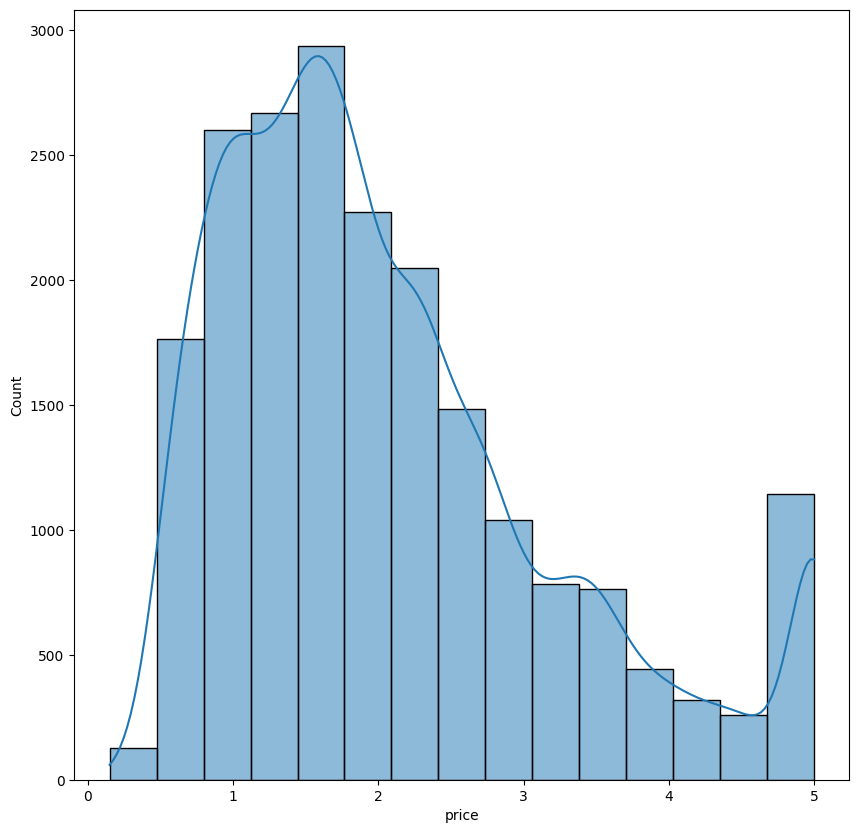

In [69]:
plt.figure(figsize = (10,10))
sns.histplot(dataset['price'], bins=15, kde = True)
plt.show()

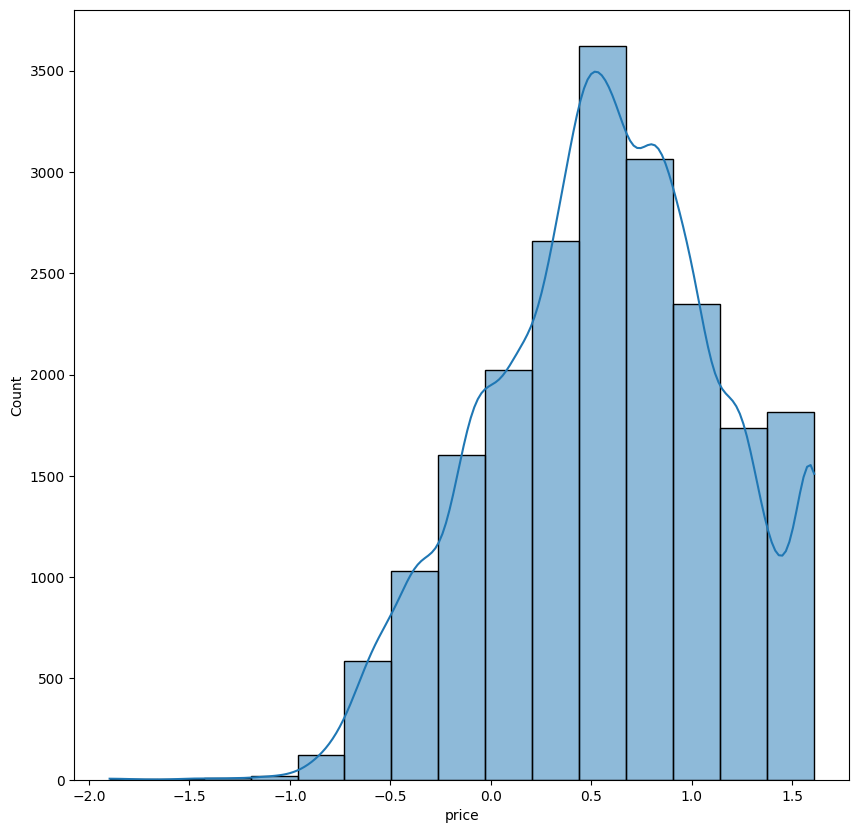

In [70]:
#right skewed data. - apply log transformation
dataset['price'] = np.log(dataset['price'])
plt.figure(figsize = (10,10))
sns.histplot(dataset['price'], bins=15, kde = True)
plt.show()

In [71]:
corr_mat = dataset.corr()
print(corr_mat)

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
price       0.658431  0.076007  0.129808  -0.058958    0.014745 -0.022588   

            Latitude  Longitude     price  
MedInc     -0.079809  -0.015176  0.658431  
HouseAge    0.011173  -0.108197  0.076007  
AveRooms    0.106389  -0.027540  0.129808  
AveBedrms   0.069721   0.013344 -0.058958  
Populatio

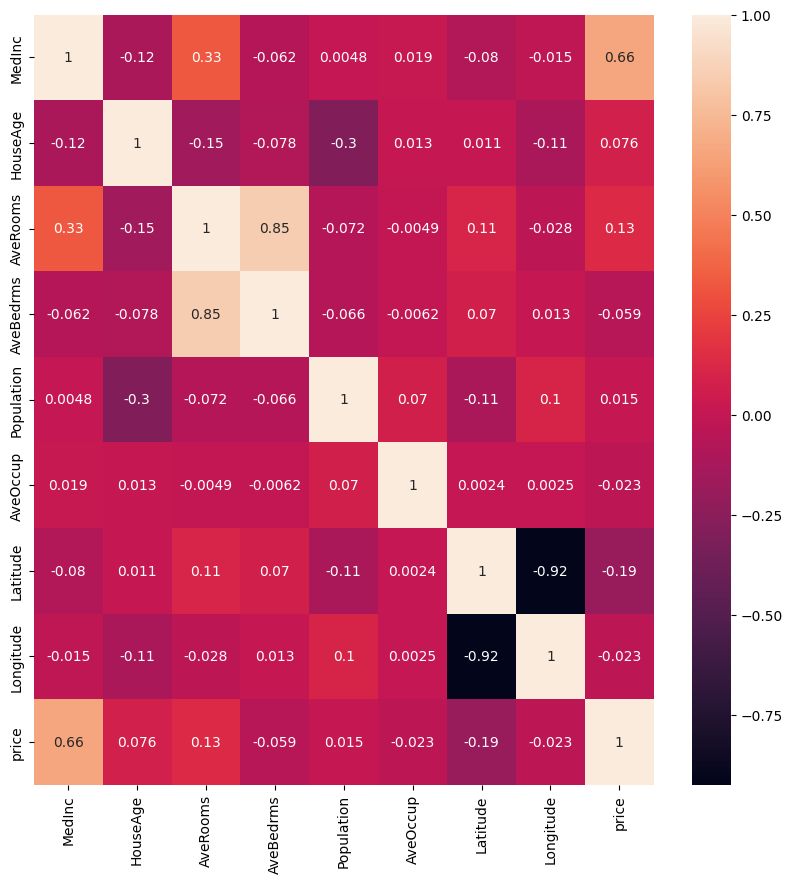

In [72]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_mat, annot = True)
plt.show()

In [73]:
dataset = dataset.drop(['Longitude'], axis = 1)
feature_dataset = dataset[['MedInc', 'HouseAge', 'AveRooms', 'Latitude']]
label_datset  = dataset['price']



In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
train_feature, test_feature, train_label, test_label = train_test_split(feature_dataset, label_datset, test_size=0.2, random_state=42)
# The order of train_label and test_label was swapped. Corrected now.

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

In [76]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, train_feature,train_label,cv = 10,scoring = 'neg_root_mean_squared_error', return_train_score = True)

In [77]:
print(cv_results)

{'fit_time': array([0.01519799, 0.01001143, 0.00945187, 0.0077405 , 0.00857711,
       0.01036835, 0.00784731, 0.00857878, 0.00908685, 0.00826669]), 'score_time': array([0.00373411, 0.00354481, 0.00299883, 0.00295162, 0.00405717,
       0.00316763, 0.00310779, 0.00461245, 0.00343132, 0.0032022 ]), 'test_score': array([-0.40020538, -0.42087248, -0.4017869 , -0.39815436, -0.414229  ,
       -0.40535933, -0.40585931, -0.43164978, -0.40769085, -0.41112619]), 'train_score': array([-0.40996656, -0.40764794, -0.40979284, -0.41019064, -0.40840592,
       -0.40939755, -0.4093474 , -0.40680995, -0.40913471, -0.40875784])}
